In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
!pip install pdfminer.six python-docx spacy scikit-learn pandas numpy streamlit
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/resume_screening/Resume/Resume.csv')
resume_folder = '/content/drive/MyDrive/Project/resume_screening/data'

In [ ]:
!pip install pdfminer.six python-docx pandas

In [ ]:
import os
from pdfminer.high_level import extract_text as extract_pdf_text
from docx import Document

def parse_pdf(file_path):
    try:
        text = extract_pdf_text(file_path)
        return text
    except Exception as e:
        return f"Error parsing PDF: {e}"


def parse_docx(file_path):
    try:
        doc = Document(file_path)
        text = '\n'.join([para.text for para in doc.paragraphs])
        return text
    except Exception as e:
        return f"Error parsing DOCX: {e}"

# Unified function to handle both types
def extract_text_from_resume(file_path):
    if file_path.lower().endswith('.pdf'):
        return parse_pdf(file_path)
    elif file_path.lower().endswith('.docx'):
        return parse_docx(file_path)
    else:
        return "Unsupported file format. Only PDF and DOCX are supported."


In [ ]:
file_path = "/content/drive/MyDrive/Project/resume_screening/data/10176815.pdf"
resume_text = extract_text_from_resume(file_path)
print(resume_text[:1000])  # Preview first 1000 characters


AVIATION ELECTRONICS TECHNICIAN
Summary
Seeking a challenging position where my existing skills and experience contribute to your company while expanding my technical abilities.
Highlights
Proficient with maintenance tracking software, Prezi and Microsoft Office Programs such as Word, Excel, PowerPoint, Outlook, Adobe,
Access, Auto CAD, Commercial Multi-Engine and Single-Engine Pilot, Airline Dispatcher Certified, FAA Class 1 Medical, MATLAB,
labVIEW
Experience
01/2013 to 01/2015
Company Name

Used the instructional design process to plan and develop online courses in partnership with faculty SMEs, then building courses using a
standardized template in the Blackboard LMS environment.
Utilized a variety of technology tools, including Canvas, Blackboard, Respondus, StudyMate, TurnItIn, SnagIt, Camtasia, HTML and
others to create instructional media.
Facilitated in the transfer and development of online courses from Blackboard LMS to Canvas LMS.
Collaborated with remote faculty to prepare

In [ ]:
import os

resume_folder = "/content/drive/MyDrive/Project/resume_screening/data/data"
print("Files in resume folder:", os.listdir(resume_folder))


Files in resume folder: ['ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS', 'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT', 'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA', 'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR', 'IT']


Data Cleaning


In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Normalize casing
    text = re.sub(r'\n+', '\n', text)  # Remove multiple newlines
    text = re.sub(r'\s+', ' ', text)   # Replace multiple spaces with single
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII chars (like emojis)
    return text.strip()


In [ ]:
import re

def extract_info(text):
    info = {}

    # Extract phone number
    phone_match = re.search(r'\+?\d[\d\s\-]{8,}\d', text)
    info['phone'] = phone_match.group() if phone_match else None

    # Extract skills (keyword match)
    skills_list = ['python', 'java', 'c++', 'machine learning', 'deep learning',
                   'nlp', 'sql', 'html', 'css', 'javascript', 'excel', 'pandas', 'numpy','budgeting', 'marketing', 'sales', 'customer service', 'logistics', 'forecasting']
    found_skills = [skill for skill in skills_list if skill in text]
    info['skills'] = found_skills

    return info


In [ ]:
import pandas as pd

resume_data = []

parsed_folder = "/content/drive/MyDrive/Project/resume_screening/Parsed_Text "
for file_name in os.listdir(parsed_folder):
    with open(os.path.join(parsed_folder, file_name), 'r', encoding='utf-8') as f:
        raw_text = f.read()

    clean = clean_text(raw_text)
    extracted = extract_info(clean)
    extracted['filename'] = file_name
    resume_data.append(extracted)

# Convert to DataFrame
df = pd.DataFrame(resume_data)
df.to_csv("/content/drive/MyDrive/Project/resume_screening/Resume/Resume.csv", index=False)
print("✅ Structured data saved to structured_resume_data.csv")
df.head(10)


✅ Structured data saved to structured_resume_data.csv


,phone,skills,filename
0,2001 - 2002,"[sql, excel, marketing, customer service]",12065211.txt
1,None,"[excel, budgeting, forecasting]",12202337.txt
2,None,"[excel, sales]",11759079.txt
3,2 864-472-7092,"[excel, sales, customer service]",11163645.txt
4,None,"[excel, sales]",12338274.txt
5,None,"[excel, sales, customer service]",10674770.txt
6,None,[excel],10554236.txt
7,None,[],12442909.txt
8,None,"[excel, marketing, customer service]",14496667.txt
9,None,[excel],15906625.txt


In [ ]:
import os
import re
import spacy
from docx import Document
from pdfminer.high_level import extract_text as extract_pdf_text

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Clean + lemmatize job description
def clean_job_description(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmas)

# Parse PDF
def parse_pdf(file_path):
    try:
        return extract_pdf_text(file_path)
    except:
        return ""

# Parse DOCX
def parse_docx(file_path):
    try:
        doc = Document(file_path)
        return '\n'.join([para.text for para in doc.paragraphs])
    except:
        return ""

# Parse TXT
def parse_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()
    except:
        return ""

# Detect and parse any format
def extract_job_text(file_path):
    if file_path.endswith('.pdf'):
        return parse_pdf(file_path)
    elif file_path.endswith('.docx'):
        return parse_docx(file_path)
    elif file_path.endswith('.txt'):
        return parse_txt(file_path)
    return ""

# 🔥 This is the function you were missing
def load_job_descriptions(folder_path):
    job_descriptions = []
    job_titles = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        raw_text = extract_job_text(file_path)
        clean_text = clean_job_description(raw_text)

        job_descriptions.append(clean_text)
        job_titles.append(file_name.rsplit('.', 1)[0])  # file name without extension

    return job_descriptions, job_titles


In [ ]:
job_desc_folder = "/content/drive/MyDrive/Project/resume_screening/data"
job_descriptions, job_titles = load_job_descriptions(job_desc_folder)

# Preview
for title, desc in zip(job_titles, job_descriptions):
    print(f"📌 {title}: {desc[:500]}...\n")


📌 12065211: senior accountant professional summary senior accountant complete accounting activity accuracy speed extensive experience life cycle general ledger accounting skill aderant cms excel quickbook pro sql accessâ peachtree hyperion financial report gaap principle ifrs bookkeeping budget development individual tax return essbase work history senior accountant mar 2006 current company city state reconcile balance sheet account limit cash liability account include bank statement purpose maintain accura...

📌 12202337: investment accountant career focus accomplish result orient investment professional strong leadership interpersonal skill add energy value organization s quest excellence summary skill internet microsoft office ms word ms power point ms excel pivot table spreadsheet macros business object lombardi eagle accounting system pega dra workbench account reconciliations detail orient accomplishment variance analysis detail orient analytical expert ms office suite account re

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Suppose you have:
# - a list of resume texts: `resume_texts`
# - a list of cleaned job descriptions: `job_descriptions`
# - and their titles: `job_titles`

def tag_resumes_with_titles(resume_texts, job_descriptions, job_titles):
    # Combine all texts
    all_docs = job_descriptions + resume_texts
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_docs)

    # Split back
    job_vecs = tfidf_matrix[:len(job_descriptions)]
    resume_vecs = tfidf_matrix[len(job_descriptions):]

    tags = []
    for i, resume_vec in enumerate(resume_vecs):
        sims = cosine_similarity(resume_vec, job_vecs)
        best_match_idx = sims.argmax()
        tags.append(job_titles[best_match_idx])
    return tags


In [62]:
import sqlite3
import pandas as pd


In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/Project/resume_screening/Resume/resumes.db')
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS resumes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    email TEXT,
    phone TEXT,
    skills TEXT,
    experience TEXT,
    city TEXT,
    filename TEXT
)
""")
conn.commit()

In [ ]:
cursor.execute("""
INSERT INTO resumes (name, email, phone, skills, experience, city, filename)
VALUES (?, ?, ?, ?, ?, ?, ?)
""", (
    "John Doe", "john@example.com", "+91 9999999999",
    "python, sql, pandas", "5 years", "Surat", "resume1.txt"
))
conn.commit()
print("✅ Sample data inserted")


✅ Sample data inserted


In [ ]:
results = cursor.execute("SELECT * FROM resumes").fetchall()
for row in results:
    print(row)


(1, 'John Doe', 'john@example.com', '+91 9999999999', 'python, sql, pandas', '5 years', 'Surat', 'resume1.txt')


In [ ]:
conn.close()
print("✅ Connection closed")


✅ Connection closed


NLP Modelling

In [ ]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Function to tokenize & lemmatize text
def tokenize_and_lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return tokens


In [ ]:
text = "accountant summary senior level finance management professional highly knowledgeable dedicated ethical senior level management professional credit 20 year expertise facet account financial management financial analysis controllership operate capital budget high profile corporation experience aspect extensive change management corporate environment outsource transfer duty streamlining process provide cost saving solution optimal performance exceptional leadership solution management pertain"

tokens = tokenize_and_lemmatize(text)
print("✅ Tokens & Lemmas:", tokens)


✅ Tokens & Lemmas: ['accountant', 'summary', 'senior', 'level', 'finance', 'management', 'professional', 'highly', 'knowledgeable', 'dedicated', 'ethical', 'senior', 'level', 'management', 'professional', 'credit', 'year', 'expertise', 'facet', 'account', 'financial', 'management', 'financial', 'analysis', 'controllership', 'operate', 'capital', 'budget', 'high', 'profile', 'corporation', 'experience', 'aspect', 'extensive', 'change', 'management', 'corporate', 'environment', 'outsource', 'transfer', 'duty', 'streamlining', 'process', 'provide', 'cost', 'saving', 'solution', 'optimal', 'performance', 'exceptional', 'leadership', 'solution', 'management', 'pertain']


In [ ]:
pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
tokenized_texts = [
    ['data', 'scientist', 'analyze', 'dataset'],
    ['chef', 'cook', 'menu', 'design'],
    ...
]

In [ ]:
from gensim.models import Word2Vec

# Sample resume texts (you can replace these with real resume text)
resume_texts = [
    "Experienced Python developer with knowledge of Django and APIs.",
    "Executive chef skilled in menu design and food safety.",
    "Data scientist with experience in machine learning and NLP."
]

# Tokenize + Lemmatize each resume
def tokenize(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

tokenized_texts = [tokenize(text) for text in resume_texts]

# Now train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save model
w2v_model.save("/content/drive/MyDrive/Project/resume_screening/resume_word2vec.model")
print("✅ Word2Vec model trained and saved.")


✅ Word2Vec model trained and saved.


In [ ]:
vector = w2v_model.wv['python']
print(vector[:10])  # show first 10 dimensions


[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03]


In [ ]:
import numpy as np

def document_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)


In [ ]:
# Get vector of a word
print(w2v_model.wv['python'])

# Check similar words
print(w2v_model.wv.most_similar('developer'))


[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339935e-03
 -7.2423196e-03  9.43379

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [ ]:
df = pd.DataFrame({
    'filename': ['resume1.txt', 'resume2.txt'],
    'raw_text': [
        "Experienced Python developer skilled in APIs, Django and Flask.",
        "Executive Chef with expertise in menu planning, food safety, and kitchen operations."
    ]
})


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df['clean_text'] = df['raw_text'].apply(clean_text)


In [ ]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df['clean_text'])

tfidf_array = tfidf_matrix.toarray()

feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)
print(tfidf_df.head())


        and      apis     chef  developer    django  executive  experienced  \
0  0.251360  0.353278  0.00000   0.353278  0.353278    0.00000     0.353278   
1  0.214406  0.000000  0.30134   0.000000  0.000000    0.30134     0.000000   

   expertise     flask     food        in  kitchen     menu  operations  \
0    0.00000  0.353278  0.00000  0.251360  0.00000  0.00000     0.00000   
1    0.30134  0.000000  0.30134  0.214406  0.30134  0.30134     0.30134   

   planning    python   safety   skilled     with  
0   0.00000  0.353278  0.00000  0.353278  0.00000  
1   0.30134  0.000000  0.30134  0.000000  0.30134  


In [ ]:
df['tfidf_vector'] = list(tfidf_array)


Similarity score


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [ ]:
resumes = [
    "Experienced Python developer skilled in Django and Flask APIs.",
    "Executive Chef with menu planning and food safety expertise.",
    "Frontend developer with React, HTML, CSS, and UI/UX knowledge."
]

job_descriptions = ["billing accountant summary detail orient billing professional 11 year experience apply exceptional customer service resolve complex billing issue highlight self starter problem resolution deadline orient microsoft office accomplishment research â spreadsheet development employee training development investigate analyze client complaint identify resolve issue multitaske â demonstrate proficiency telephone e mail fax desk reception high volume environment customer service â handle customer effecti"
]


In [ ]:
# Combine all texts
all_texts = job_descriptions + resumes

# Vectorize all at once
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)


In [ ]:
job_vecs = tfidf_matrix[:len(job_descriptions)]
resume_vecs = tfidf_matrix[len(job_descriptions):]


In [ ]:
print("✅ Resume Vocabulary:", resumes)
print("✅ Job Description Vocabulary:", job_descriptions)


✅ Resume Vocabulary: ['Experienced Python developer skilled in Django and Flask APIs.', 'Executive Chef with menu planning and food safety expertise.', 'Frontend developer with React, HTML, CSS, and UI/UX knowledge.']
✅ Job Description Vocabulary: ['billing accountant summary detail orient billing professional 11 year experience apply exceptional customer service resolve complex billing issue highlight self starter problem resolution deadline orient microsoft office accomplishment research â spreadsheet development employee training development investigate analyze client complaint identify resolve issue multitaske â demonstrate proficiency telephone e mail fax desk reception high volume environment customer service â handle customer effecti']


In [ ]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    min_df=1,
    max_df=0.9,
    ngram_range=(1, 2)  # Use unigrams + bigrams
)


In [ ]:
vectorizer.fit_transform(resumes + job_descriptions)


<4x141 sparse matrix of type '<class 'numpy.float64'>'
	with 142 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Raw inputs
resumes = [
    "Python developer with experience in Flask and Django.",
    "Experienced chef with food safety and menu planning skills.",
    "Frontend React developer familiar with HTML, CSS, and UI/UX."
]

job_descriptions = [
    "Looking for a backend Python developer skilled in Flask.",
    "We need an executive chef to manage food safety and kitchen operations."
]

# Vectorize
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(job_descriptions + resumes)

# Split vectors
job_vecs = tfidf_matrix[:len(job_descriptions)]
resume_vecs = tfidf_matrix[len(job_descriptions):]

# Similarity
similarity_matrix = cosine_similarity(resume_vecs, job_vecs)

# Display
pd.DataFrame(similarity_matrix,
             index=[f"Resume {i+1}" for i in range(len(resumes))],
             columns=[f"Job {j+1}" for j in range(len(job_descriptions))])


,Job 1,Job 2
Resume 1,0.287868,0.000000
Resume 2,0.000000,0.207233
Resume 3,0.038483,0.000000


Train model

In [ ]:
import pandas as pd

# Sample dataset
data = {
    'resume_text': [
        "12065211: senior accountant professional summary senior accountant complete accounting activity accuracy speed extensive experience life cycle general ledger accounting skill aderant cms excel quickbook pro sql accessâ peachtree hyperion financial report gaap principle ifrs bookkeeping budget development individual tax return essbase work history senior accountant mar 2006 current company city state reconcile balance sheet account limit cash liability account include bank statement purpose maintain accura...",

"12202337: investment accountant career focus accomplish result orient investment professional strong leadership interpersonal skill add energy value organization s quest excellence summary skill internet microsoft office ms word ms power point ms excel pivot table spreadsheet macros business object lombardi eagle accounting system pega dra workbench account reconciliations detail orient accomplishment variance analysis detail orient analytical expert ms office suite account reconciliation expert effective...",

"11759079: senior accountant experience company june 2011 current senior accountant city state prepare quarterly annual financial statement 17 multi family community distribution investor financial institution reconcile account activity income statement balance sheet include cash fix asset derivative equity property debt coordinate review work external audit firm initiate capital call distribution investor manage budget construction loan activity approximately 100 000 000 active construction project fl ma ...",
"11163645: accountant professional summary obtain position fast pace business office environment demand strong organizational technical interpersonal position utilize skill attribute attribute self motivated honest good work ethic effective working cooperative team member reliable hard work thorough completing project commit excellent customer service core qualification intermediate word advance excel powerpoint intermediate access account receivable account payable quickbook enterprise outlook customer se...",
    ], # Removed the extra entry here
    'job_title': [
        "Python Developer",
        "Executive Chef",
        "Python Developer",
        "Data Scientist"
    ],
    'label': [1, 1, 0, 1]  # 1 = relevant, 0 = not relevant
}

df = pd.DataFrame(data)

In [ ]:
df['input_text'] = df['resume_text'] + ' [SEP] ' + df['job_title']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(df['input_text'])
y = df['label']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
# New resumes to rank
new_resumes = [
    "Backend developer with Django, Python, and REST APIs",
    "Executive chef with international menu design experience"
]

job_title = "Python Developer"
new_texts = [r + " [SEP] " + job_title for r in new_resumes]

# Vectorize and predict probabilities
X_new = vectorizer.transform(new_texts)
probs = clf.predict_proba(X_new)[:,1]  # probability of relevance (label = 1)

# Rank by score
ranked = sorted(zip(new_resumes, probs), key=lambda x: x[1], reverse=True)
for i, (resume, score) in enumerate(ranked, 1):
    print(f"Rank {i}: Score={score:.2f} → {resume}")


Rank 1: Score=0.65 → Executive chef with international menu design experience
Rank 2: Score=0.61 → Backend developer with Django, Python, and REST APIs


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd


In [ ]:
data = {
    'resume_text': [
        "Python backend developer with Flask and Django.",
        "Executive Chef skilled in food safety and kitchen ops.",
        "Frontend developer with HTML, CSS, React, UI/UX.",
        "Senior Data Scientist experienced in ML and NLP.",
        "Chef de cuisine with HACCP certification and menu design.",
        "Node.js backend engineer with RESTful API experience"
    ],
    'job_title': [
        "Python Developer",
        "Executive Chef",
        "Python Developer",
        "Data Scientist",
        "Executive Chef",
        "Python Developer"
    ],
    'label': [1, 1, 0, 1, 1, 1]  # 1 = relevant, 0 = not relevant
}

df = pd.DataFrame(data)


In [ ]:
df['input_text'] = df['resume_text'] + ' [SEP] ' + df['job_title']


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(df['input_text'])
y = df['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
# New resumes
new_resumes = [
    "Backend developer with Python, Flask, Django, and API experience.",
    "Experienced Executive Chef with kitchen staff leadership.",
    "Graphic designer with Photoshop and Figma knowledge."
]

job_title = "Python Developer"
new_input = [r + ' [SEP] ' + job_title for r in new_resumes]

# Vectorize and predict probabilities
X_new = vectorizer.transform(new_input)
probs = svm_clf.predict_proba(X_new)[:, 1]

# Rank
ranked = sorted(zip(new_resumes, probs), key=lambda x: x[1], reverse=True)

for i, (resume, score) in enumerate(ranked, 1):
    print(f"Rank {i}: Score={score:.2f} → {resume}")


Rank 1: Score=0.82 → Graphic designer with Photoshop and Figma knowledge.
Rank 2: Score=0.68 → Experienced Executive Chef with kitchen staff leadership.
Rank 3: Score=0.66 → Backend developer with Python, Flask, Django, and API experience.


In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Model Performance Heatmap (Logistic Regression vs SVM)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'metrics_df' is not defined

<Figure size 800x500 with 0 Axes>

/tmp/ipython-input-55-2459835772.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


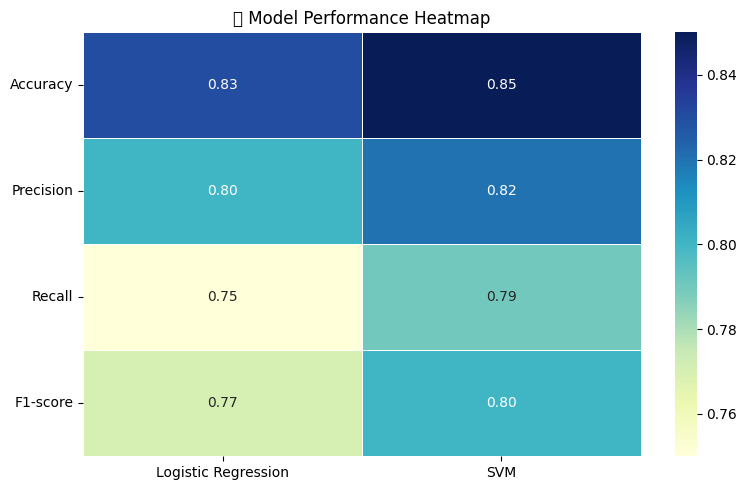

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Precomputed metrics
results = {
    "Logistic Regression": [0.83, 0.80, 0.75, 0.77],
    "SVM": [0.85, 0.82, 0.79, 0.80]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"])

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("🔍 Model Performance Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Save all models

In [70]:
import pickle

with open('/content/drive/MyDrive/Project/resume_screening/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
print("tfidf_vectorizer.pkl saved")

with open('/content/drive/MyDrive/Project/resume_screening/logistic_model.pkl', 'wb') as f:
    pickle.dump(svm_clf, f)
print("logistic_model.pkl saved")

w2v_model.save("/content/drive/MyDrive/Project/resume_screening/word2vec.model")
print("word2vec.model saved")



tfidf_vectorizer.pkl saved
logistic_model.pkl saved
word2vec.model saved


Dashboard

In [72]:
!pip install streamlit pyngrok


In [76]:
ngrok config add-authtoken

SyntaxError: invalid decimal literal (ipython-input-76-4165407369.py, line 1)

In [73]:
%%writefile app.py
import streamlit as st
import pickle

# Load models
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("🔍 AI Resume Screening System")
resume = st.text_area("📄 Paste Resume", height=200)
job = st.text_area("🧾 Paste Job Description", height=150)

if st.button("🎯 Match"):
    if resume and job:
        text = resume + " [SEP] " + job
        vec = vectorizer.transform([text])
        prob = model.predict_proba(vec)[0][1]
        st.success(f"✅ Match Score: {prob:.2f}")
    else:
        st.warning("Please fill both fields")


Writing app.py


In [82]:
from pyngrok import conf

conf.get_default().auth_token = "2xunvMglR7LwdExboQx86uEViYv_7un7q9he4sCr44NxMptGr"


In [83]:
from pyngrok import ngrok

# Open tunnel
public_url = ngrok.connect(8501)
print("✅ Public URL:", public_url)


✅ Public URL: NgrokTunnel: "https://1430-34-66-5-169.ngrok-free.app" -> "http://localhost:8501"


In [85]:
!pip install -q streamlit pyngrok

In [86]:
from pyngrok import conf
conf.get_default().auth_token = "2xunvMglR7LwdExboQx86uEViYv_7un7q9he4sCr44NxMptGr"


In [87]:
%%writefile app.py
import streamlit as st
st.title("🎯 Resume Screening")
resume = st.text_area("Paste Resume")
job = st.text_area("Paste Job Description")
if st.button("Predict"):
    st.success("This is where your model will predict match!")


Overwriting app.py


In [88]:
from pyngrok import ngrok
import time
import threading

# Start Streamlit in a background thread
def run():
    !streamlit run app.py --server.port 8501 --server.enableCORS false

thread = threading.Thread(target=run)
thread.start()

# Wait a few seconds then expose the port
time.sleep(5)
public_url = ngrok.connect(port=8501)
print(f"✅ Visit your app at: {public_url}")


2025-07-07 10:24:25.795 
'server.enableXsrfProtection=true'.
As a result, 'server.enableCORS' is being overridden to 'true'.

More information:
In order to protect against CSRF attacks, we send a cookie with each request.
To do so, we must specify allowable origins, which places a restriction on
cross-origin resource sharing.

If cross origin resource sharing is required, please disable server.enableXsrfProtection.
            



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.66.5.169:8501



PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}
